In [69]:
import chess
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple, List
import pandas as pd
from our_graph2_encode import move_to_index, encode_node_features, create_batch_from_boards, encode_edge_features, encode_global_node_features, static_edge_index, static_edge_map, base_graph_edges, index_to_move

In [70]:
# helper functions
def index_of(arr, value):
    for i in range(len(arr)):
        if arr[i] == value:
            return i
    
    return -1

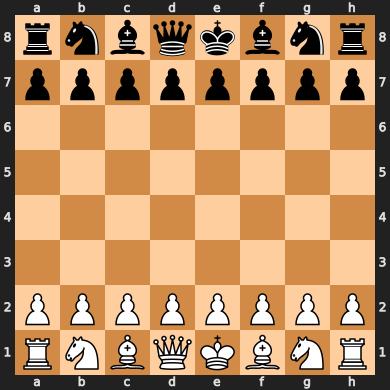

In [71]:
board = chess.Board()

nodes = encode_node_features(board)
edges = encode_edge_features(board, base_graph_edges)
g_features = encode_global_node_features(board)

board

In [72]:
print(nodes.shape)
print(edges.shape)

(64, 12)
(1792, 11)


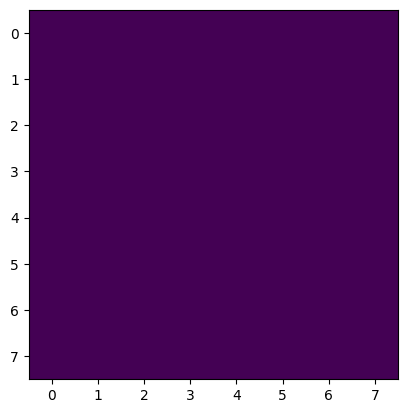

In [73]:
a = np.zeros(64)
a.resize((8, 8))
plt.imshow(a)

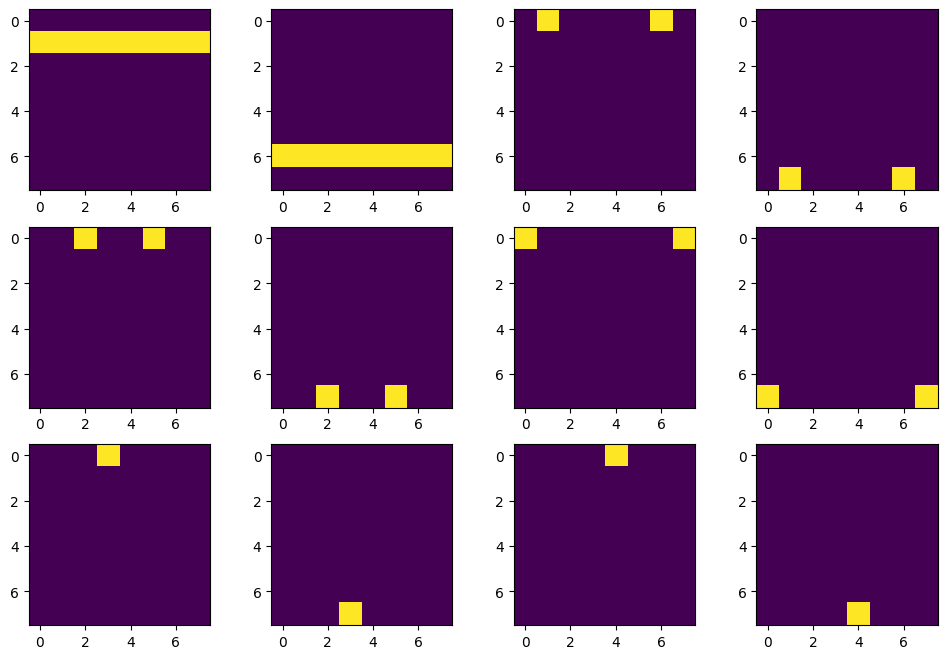

In [74]:
fig, axs = plt.subplots(3, 4, figsize=(12, 8))

for i, ax in enumerate(axs.flat):
    ax.imshow(nodes[:, i].reshape(8, 8))

In [75]:
# fig, axs = plt.subplots(3, 4, figsize=(12, 8))

# arr1 = np.zeros((12, 64))

# arr2 = np.random.randint(64, size=(12))
# while len(set(arr2)) != 12:
#     arr2 = np.random.randint(64, size=(12))

# for i in range(len(arr2)):
#     for j in range(edges.shape[1]):
#         index = index_of(arr2, edges[0, j])
#         if index != -1:
#             arr1[index, edges[1, j]] = 1

# for i, ax in enumerate(axs.flat):
#     ax.imshow(arr1[i].reshape(8, 8))



In [76]:
df = pd.read_csv("kingbase_processed_all.csv")

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684643 entries, 0 to 684642
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Event       684643 non-null  object
 1   Site        684643 non-null  object
 2   Date        684643 non-null  object
 3   White       684643 non-null  object
 4   Black       684643 non-null  object
 5   Result      684643 non-null  object
 6   WhiteElo    684643 non-null  int64 
 7   BlackElo    684643 non-null  int64 
 8   ECO         684643 non-null  object
 9   TotalMoves  684643 non-null  int64 
 10  Moves_UCI   684643 non-null  object
dtypes: int64(3), object(8)
memory usage: 57.5+ MB


In [99]:
# preprocess
# all_games = []
# for i in range(len(df)):
#     move_str_array = df["Moves_UCI"][i].split(" ")
#     move_uci_array = []
#     for j in range(len(move_str_array)):
#         move_uci_array.append(chess.Move.from_uci(move_str_array[j]))

#     all_games.append(move_uci_array)

In [ ]:
def get_board(game_number, move_number):
    all_moves = df["Moves_UCI"]
    move_uci_array = all_moves[game_number].split(" ")
    board = chess.Board()
    for i in range(move_number):
        move = chess.Move.from_uci(move_uci_array[i])
        board.push(move)

    return board

def get_move_from_dataset(game_number, move_number):
    return chess.Move.from_uci(df["Moves_UCI"][game_number].split(" ")[move_number])

def get_move_uci_array_from_dataset(game_number):
    return df["Moves_UCI"][game_number].split(" ")

In [80]:
game_number = 0
move_number = 0

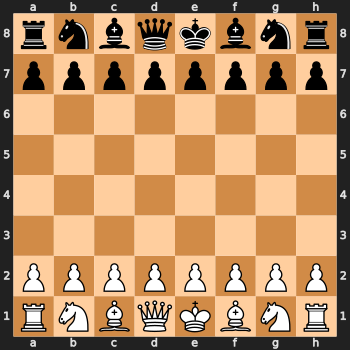

In [81]:
# arrows

board = get_board(game_number, move_number)
svg = chess.svg.board(
    board,
    # arrows=[chess.svg.Arrow(move.from_square, move.to_square, color="#0000cccc")],
    size=350,
) 

move_number += 1

svg

0-1
False


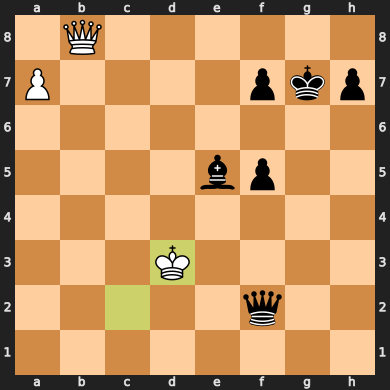

In [82]:
ran = np.random.randint(len(df))

all_moves = df["Moves_UCI"]
move_uci_array = all_moves[ran].split(" ")

board = get_board(ran, len(move_uci_array) - 1)

print(df["Result"][ran])
print(board.is_checkmate())
board

In [105]:
# initialize hello world
from helloworld import start_model, model_predict
board = chess.Board()
model = start_model()

def get_model_move(board):
    pred_moves, pred_eval = model_predict(model, board)
    return index_to_move[np.argmax(pred_moves)]

Using device: cpu


d:\programming\github\Advance_Machine_Learning_Project\helloworld.py:39: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path, map_location=

e2e4


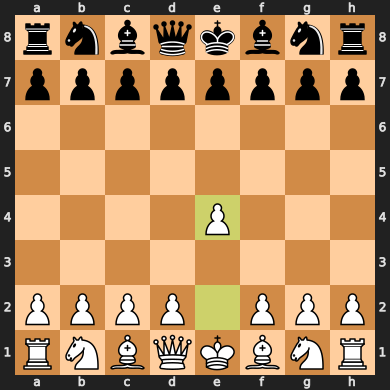

In [ ]:
# hello world

pred_moves, pred_eval = model_predict(model, board)
print(index_to_move[np.argmax(pred_moves)])

board.push(index_to_move[np.argmax(pred_moves)])
board

In [240]:
counter1 = 0
counter2 = 0

for i in range(len(df)):
    board = chess.Board()
    for j in range(len(get_move_uci_array_from_dataset(i))):
        dataset_move = get_move_from_dataset(i, j)
        model_move = get_model_move(board)

        # print(get_model_move(board), end=" ")
        # print(get_move_from_dataset(i, j))

        # print(dataset_move in board.legal_moves)
        # print(model_move in board.legal_moves)

        if (model_move == dataset_move):
            counter1 += 1
        
        counter2 += 1

        board.push(dataset_move)

    print(f"correct rate: {counter1 / counter2}")



correct rate: 0.275
correct rate: 0.28112449799196787
correct rate: 0.29141104294478526
correct rate: 0.2914572864321608
correct rate: 0.2842535787321063
correct rate: 0.2966417910447761
correct rate: 0.2922848664688427
correct rate: 0.2910344827586207
correct rate: 0.2894088669950739
correct rate: 0.29205607476635514
correct rate: 0.28773072747014117
correct rate: 0.2883817427385892
correct rate: 0.2798913043478261
correct rate: 0.2751677852348993
correct rate: 0.28244897959183674
correct rate: 0.2828054298642534
correct rate: 0.2865208186309104
correct rate: 0.28664072632944226


KeyboardInterrupt: 

In [305]:
ran = np.random.randint(len(df))
counter = 0
print(ran)
board = chess.Board()

575611


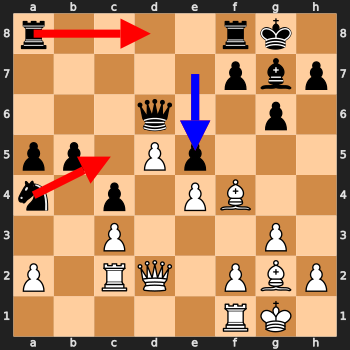

In [341]:
dataset_move = get_move_from_dataset(ran, counter)
model_move = get_model_move(board)
model_move_vec, eval = model_predict(model, board)
top_moves = [index_to_move[a] for a in np.flip(np.argsort(model_move_vec[0]))[:3]]

# print(dataset_move in board.legal_moves)
# print(model_move in board.legal_moves)

board.push(dataset_move)
counter += 1

svg = chess.svg.board(
    board,
    arrows=[
        chess.svg.Arrow(top_moves[0].from_square, top_moves[0].to_square, color="#ff0000ff"),
        chess.svg.Arrow(top_moves[1].from_square, top_moves[1].to_square, color="#ff0000a8"),
        chess.svg.Arrow(top_moves[2].from_square, top_moves[2].to_square, color="#ff000056"),
        chess.svg.Arrow(dataset_move.from_square, dataset_move.to_square, color="#0000ffff"),
    ],
    size=350,
) 
svg

In [301]:
a = np.array([6,3,2,9,4,1,2,0])
print(np.flip(np.argsort(a))[:5])
b = [str(a) for a in np.flip(np.argsort(a))[:3]]
print(np.flip(np.argsort(a)))
print(b)

[3 0 4 1 6]
[3 0 4 1 6 2 5 7]
['3', '0', '4']


In [343]:
board = chess.Board(fen="k7/8/8/8/8/8/8/K2Q4 w - - 0 1")

a1b2


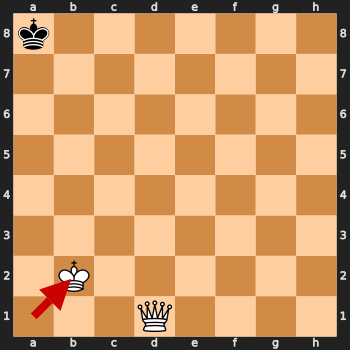

In [344]:
model_move = get_model_move(board)
print(model_move)
board.push(model_move)

svg = chess.svg.board(
    board,
    arrows=[
        chess.svg.Arrow(model_move.from_square, model_move.to_square, color="#cc0000cc", )
    ],
    size=350,
) 
svg